# Importare dati

Per importare i dati, utilizziamo le funzioni "built-in" di pandas.

Per questo esempio stiamo importando da STATA, ma è possibile importare vari formati di dati con funzioni diverse, ma con la stessa firma.

Il comando base è il seguente:
```python
data_frame = pd.read_stata('/path/to/data.dta')
```

In [1]:
import pandas as pd

df = pd.read_stata('../Data/rent99.dta')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082 entries, 0 to 3081
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rent      3082 non-null   float32
 1   rentsqm   3082 non-null   float32
 2   area      3082 non-null   float32
 3   yearc     3082 non-null   float32
 4   location  3082 non-null   float32
 5   bath      3082 non-null   float32
 6   kitchen   3082 non-null   float32
 7   cheating  3082 non-null   float32
 8   district  3082 non-null   float32
dtypes: float32(9)
memory usage: 132.4 KB


Tutti i dati sono dello stesso tipo, anche se non dovrebbe essere così, quindi possiamo modificare il tipo delle colonne con i dizionari.
```python
data_frame = data_frame.astype({'nome_colonna': 'tipo', '..':'..',  ...})
```
Nell'esempio cambieremo il tipo di  yearc, location, bath, kitchen, cheating, district da float32 a int64

In [2]:
df = df.astype({'yearc':'int64', 'location':'int64', 'bath':'int64', 'kitchen':'int64','cheating':'int64', 'district':'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082 entries, 0 to 3081
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rent      3082 non-null   float32
 1   rentsqm   3082 non-null   float32
 2   area      3082 non-null   float32
 3   yearc     3082 non-null   int64  
 4   location  3082 non-null   int64  
 5   bath      3082 non-null   int64  
 6   kitchen   3082 non-null   int64  
 7   cheating  3082 non-null   int64  
 8   district  3082 non-null   int64  
dtypes: float32(3), int64(6)
memory usage: 204.7 KB


## Descrizione del dataset

Per avere la lista dei nomi delle colonne, ogni oggetto di tipo **DataFrame** ha l'attributo columns

```python
data_frame.columns
```

In [3]:
df.columns

Index(['rent', 'rentsqm', 'area', 'yearc', 'location', 'bath', 'kitchen',
       'cheating', 'district'],
      dtype='object')

Se vogliamo una descrizione generica del dataset possiamo usare il comando: `corr()`

- Per tutto il dataset
  
    ```python
    data_frame.describe()
    ```
- Per una o più variabili passando una lista
  
    ```python
    data_frame['var1','var2', ...].describe()  
    ```


In [4]:
df.describe()

,rent,rentsqm,area,yearc,location,bath,kitchen,cheating,district
count,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000
mean,459.437225,7.111259,67.374756,1956.244971,1.443219,0.061973,0.042505,0.895847,1169.715769
std,195.656631,2.436008,23.720448,22.298381,0.545425,0.241145,0.201771,0.305509,677.849333
min,40.512821,0.415800,20.000000,1918.000000,1.000000,0.000000,0.000000,0.000000,113.000000
25%,322.025635,5.260958,51.000000,1939.000000,1.000000,0.000000,0.000000,1.000000,561.000000
50%,426.974350,6.980241,65.000000,1959.000000,1.000000,0.000000,0.000000,1.000000,1025.000000
75%,559.358994,8.840824,81.000000,1972.000000,2.000000,0.000000,0.000000,1.000000,1714.000000
max,1843.384644,17.721611,160.000000,1997.000000,3.000000,1.000000,1.000000,1.000000,2529.000000


In [5]:
df["rent"].describe()

count    3082.000000
mean      459.437225
std       195.656631
min        40.512821
25%       322.025635
50%       426.974350
75%       559.358994
max      1843.384644
Name: rent, dtype: float64

### Correlazione tra variabili

La correlazione si può fare su tutto il dataframe oppure su colonne specifiche passando una lista di colonne, sempre utilizzando la funzione `corr()`

- Per tutto il dataset
  
  ```python
  data_frame.corr()
  ```
- Per colonne specifice
  ```python
  data_frame[['var1','var2', ...]].corr()
  ```
  > Notare la doppia parentesi quadra!

In [6]:
df.corr()

,rent,rentsqm,area,yearc,location,bath,kitchen,cheating,district
rent,1.000000,0.502515,0.584531,0.134711,0.170434,0.251465,0.167212,0.230220,-0.020700
rentsqm,0.502515,1.000000,-0.340731,0.389192,0.088021,0.050079,0.123437,0.324072,0.045991
area,0.584531,-0.340731,1.000000,-0.230283,0.113295,0.229093,0.042378,-0.049388,-0.093812
yearc,0.134711,0.389192,-0.230283,1.000000,-0.156056,0.068704,0.110079,0.365653,0.329021
location,0.170434,0.088021,0.113295,-0.156056,1.000000,0.032932,-0.011979,-0.083224,-0.286110
bath,0.251465,0.050079,0.229093,0.068704,0.032932,1.000000,0.065917,0.078831,0.039786
kitchen,0.167212,0.123437,0.042378,0.110079,-0.011979,0.065917,1.000000,0.056045,0.032851
cheating,0.230220,0.324072,-0.049388,0.365653,-0.083224,0.078831,0.056045,1.000000,0.137607
district,-0.020700,0.045991,-0.093812,0.329021,-0.286110,0.039786,0.032851,0.137607,1.000000


In [7]:
df[['rent','area','yearc']].corr()

,rent,area,yearc
rent,1.000000,0.584531,0.134711
area,0.584531,1.000000,-0.230283
yearc,0.134711,-0.230283,1.000000


# Plotting

Per visualizzare i dati useremo la libreria **seaborn**.

> Scaricando seaborn si scarica anche la sua dipendenza a **matplotlib** che può essere importata se necessario

Nelle sezioni seguenti vedremo come fare diversi tipi di plot, tra cui:

- grafici a barre
- istogrammi
- scatterplot

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

## Grafici a barre
Il comando per generare un **grafico a barre** è:
```python
nome_plot = sns.countplot(data = nome_dataframe, x = nome_colonna_da_plottare)
```

Text(0, 0.5, 'Count')

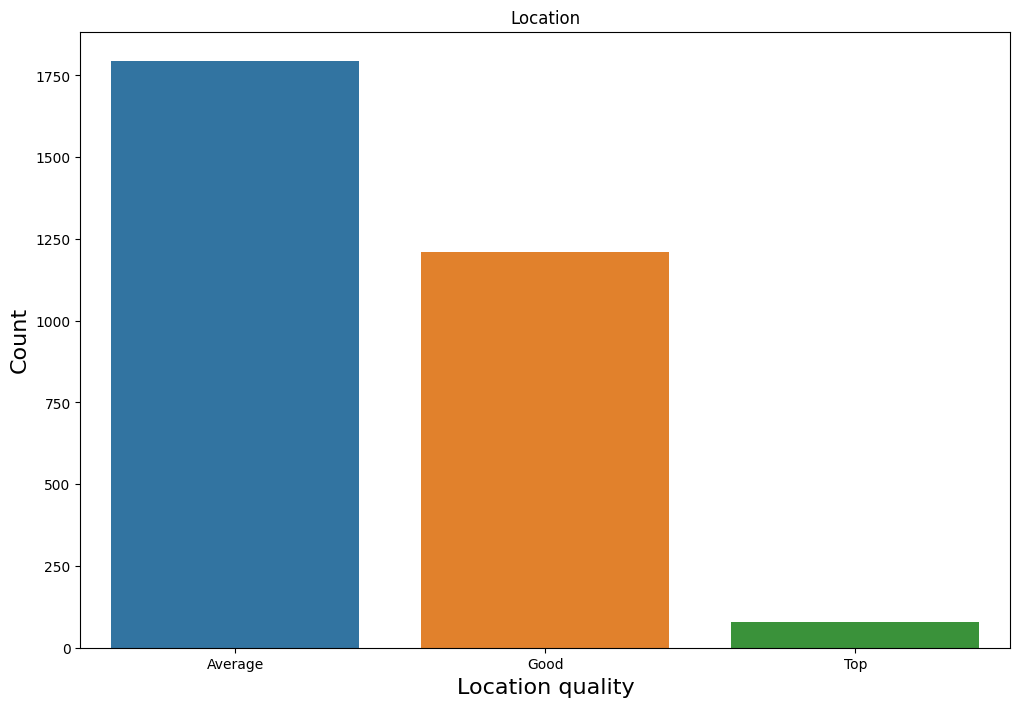

In [9]:
plt.figure(figsize=(12,8))
location = sns.countplot(data = df, x="location")
location.set(xticklabels=["Average","Good","Top"])
plt.title("Location")
plt.xlabel("Location quality",size=16)
plt.ylabel("Count",size=16)

## Istogramma e Kernel density
Il comando per generare un **istogramma** è:
```python
nome_plot = sns.histplot(data = nome_dataframe, x = nome_colonna_da_plottare)
```

Se vogliamo anche plottare la **kernel density** aggiungiamo il parametro `kde=True`,che di default è `False`
```python
nome_plot = sns.histplot(data = nome_dataframe, x = nome_colonna_da_plottare,kde=True)
```

Possiamo anche cambiare il valore delle y da conteggio a densità con `stat="density` che di default è `count` 

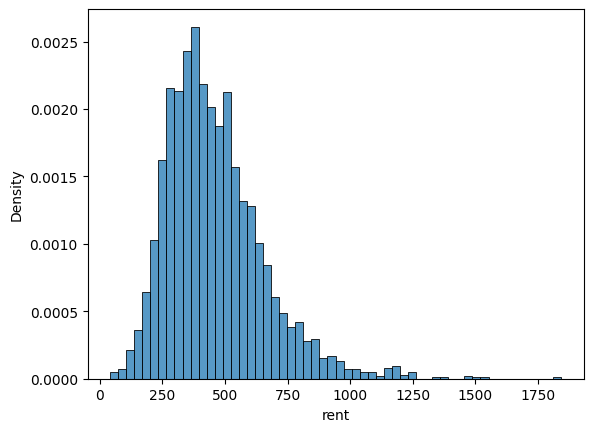

In [10]:
rent = sns.histplot(data = df, x="rent",stat="density")

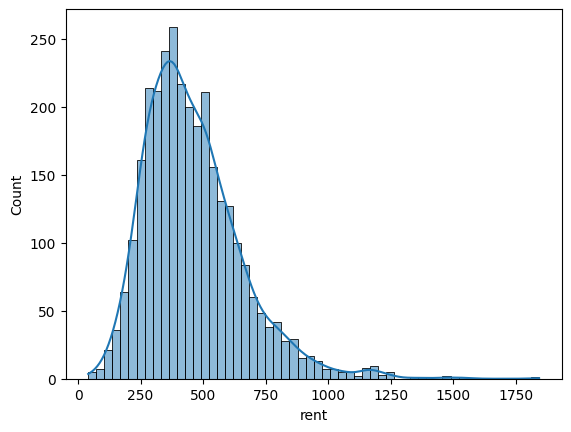

In [11]:
rent_kernel = sns.histplot(data = df, x="rent",kde=True)

## Scatter plot e Stratified scatter plot

Lo **scatter plot** base è implementato di base in seaborn con 
```python
sns.scatterplot(data=data_frame, x= ascissa , y= ordinata)
```


<AxesSubplot: xlabel='area', ylabel='rent'>

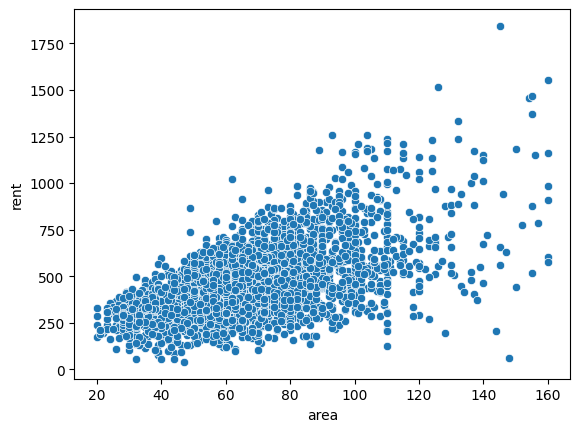

In [12]:
sns.scatterplot(data=df, x="area", y="rent")

Lo **stratified scatter plot** si usa se il numero di differenti valori della variabile esplicativa, è relativamente più piccolo della dimensione del campione.

Cioè, nell'esempio sopra, abbiamo poche aree distinte rispetto al totale delle osservazioni, e questo porta ad uno scatterplot molto denso di punti e di difficile interpretazione.
Quello che possiamo fare è di plottare le aree distinte e la loro deviazione standard, per migliore interpretazione.

Questa funzione non è implementato, ma possiamo ricavarlo unendo le funzioni `scatterplot` e `vlines` eseguendo i seguenti passi:

1. Prendere un sottoinsieme del dataset che comprende la covariata e la variabile esplicativa
2. Raggruppare per la covariata
3. Su questa nuova **Serie** calcolare media e deviazione standard
4. Calcolare il minimo e il massimo di ogni punto medio usando la deviazione standard
5. Plottare i punti medi con `scatterplot`
6. Plottare gli intervalli con `vlines`


> Usando il `groupby('area')` viene restituita una **Serie** con indice `area`, quindi se vogliamo le aree dobbiamo usate `df.index` mentre se vogliamo i valori della serie quindi **media** o **deviazione standard** dobbiamo usare `df.values`

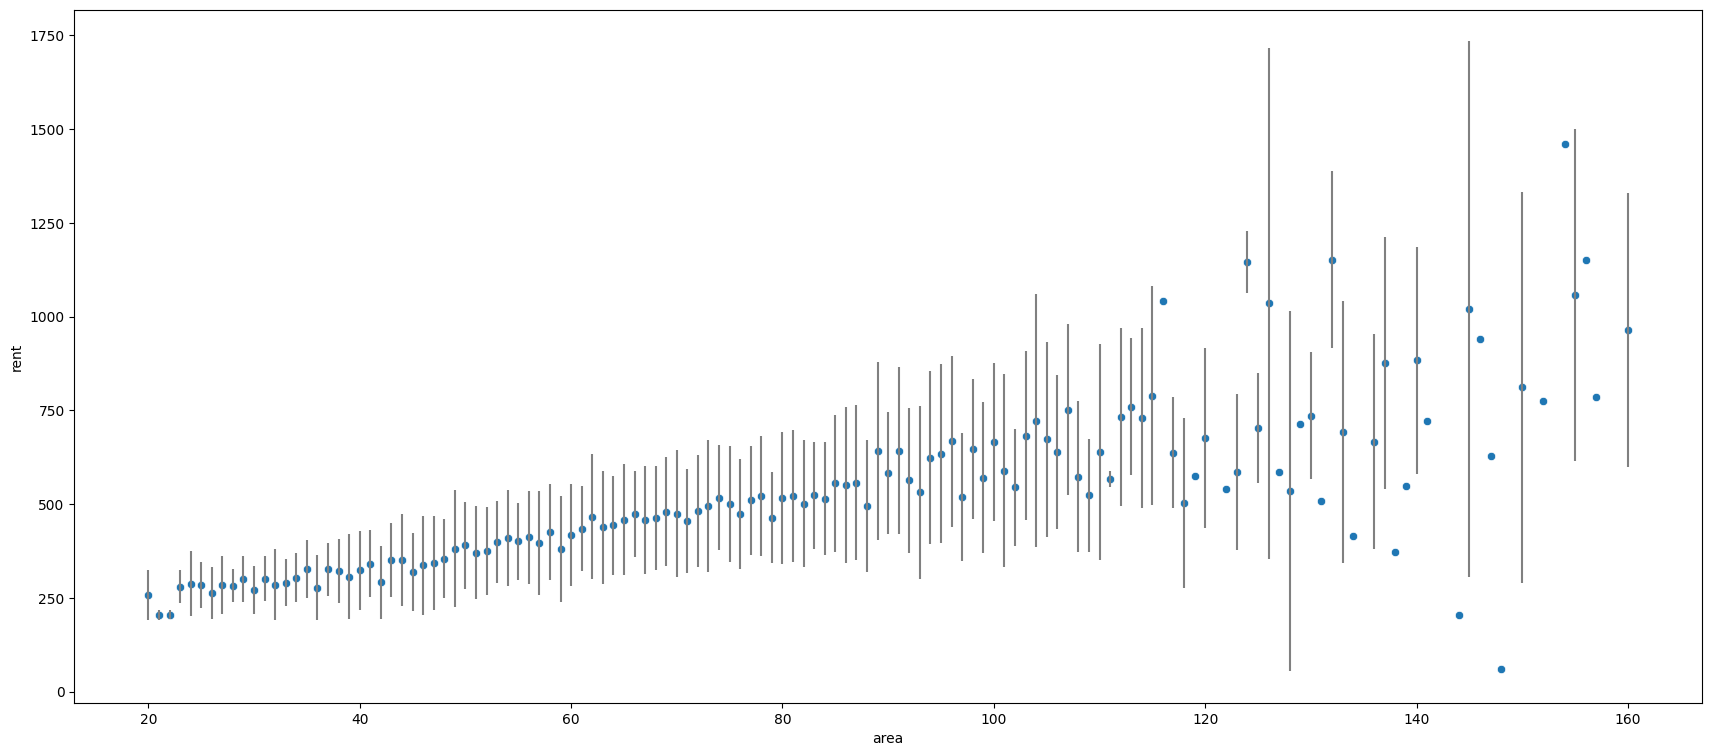

In [13]:
plt.figure(figsize=(21,9))
df_mean = df[['area','rent']].groupby('area').mean()
df_std = df[['area','rent']].groupby('area').std()
ymax = df_mean + df_std
ymin = df_mean - df_std
scat = sns.scatterplot(data = df_mean, x='area', y='rent')
plt.vlines(x = df_mean.index,ymin=ymin.values,ymax=ymax.values,colors='gray')

## Box plot

Il box plot serve a confrontare variabili continue contro quelle categoriche.
Possiamo usare la funzione `boxplot` in questo modo:

```python
nome_plot = sns.boxplot(data = nome_dataframe, x = variabile_categorica, y = variabile_continua)
```

### Interpretazione box plot

La **linea orizzontale** in ogni boxplot è la mediana che corrisponte al 50-esimo percentile.

Ogni boxplot è diviso in quartili dove i quartili colorati sono il secondo e il terzo quartile oppure 25-esimo e 75-esimo percentile dei dati.

Il box (colorato) è chiamato **range interquartile**.

Le linee che si estendono dal box sono dette **baffi** e rappresentano la variazione dei dati attesa e si estendono per 1,5 volte dal range interquartile.

I dati fuori dai baffi sono rappresentati come punti considerati **outlier** e vale la pena esaminarli.

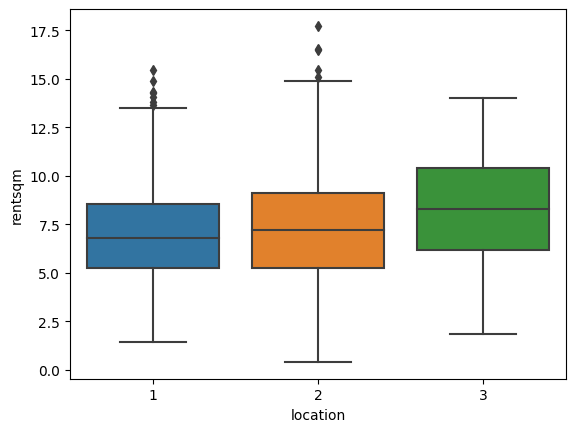

In [14]:
box = sns.boxplot(data=df,x=df['location'],y=df['rentsqm'])